# Fully Connected Networks

# Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt

#
from tqdm import tqdm

# Time
import time

# OS
import sys

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import * 
from idlmam import *

# Scikit-Learn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

/shared-libs/python3.10/py/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/shared-libs/python3.10/py/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Visualization Set-Up

In [2]:
# Visualization Performance Set-Up
%matplotlib inline

matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')

### Setting Seed

In [3]:
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)

torch.backends.cudnn.deterministic=True

set_seed(42)

In [4]:
def train_simple_network(model, loss_func, training_loader, epochs=20, device="cpu"):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(training_loader, desc="Batch", leave=False):
            inputs = moveTo(inputs, device)
            labels = moveTo(labels, device)
            optimizer.zero_grad()
            y_hat = model(inputs) 
            loss = loss_func(y_hat, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

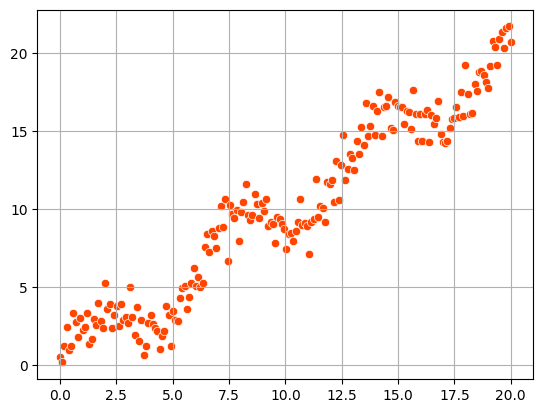

In [5]:
X = np.linspace(0, 20, num=200)

y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

sns.scatterplot(x=X, y=y, color='orangered')
plt.grid(True)
plt.show()

In [6]:
class Simple1DRegressionDataset(Dataset):
        
    def __init__(self, X, y):
        super(Simple1DRegressionDataset, self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)
        
    
    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]
    
training_loader = DataLoader(Simple1DRegressionDataset(X, y), shuffle=True)

In [7]:
in_features = 1
out_features = 1
model = nn.Linear(in_features, out_features)
loss_func = nn.MSELoss()

device = torch.device("cuda")
train_simple_network(model, loss_func, training_loader, device=device)

Epoch: 100%|██████████| 20/20 [00:03<00:00,  5.11it/s]


In [8]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

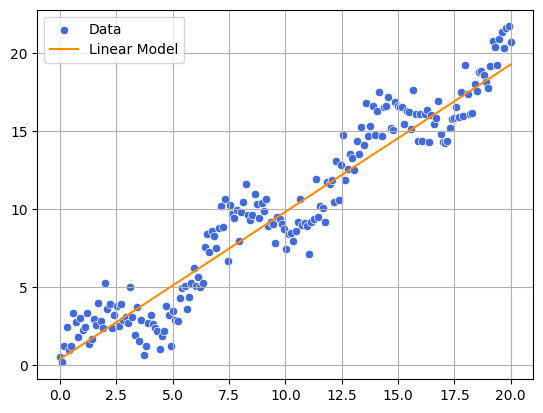

In [9]:
sns.scatterplot(x=X, y=y, color='royalblue', label='Data') 
sns.lineplot(x=X, y=Y_pred.ravel(), color='darkorange', label='Linear Model') 
plt.grid(True)
plt.show()

In [10]:
model = nn.Sequential(
    nn.Linear(1,  10), 
    nn.Linear(10, 1), 
)

train_simple_network(model, loss_func, training_loader)

Epoch: 100%|██████████| 20/20 [00:02<00:00,  7.86it/s]


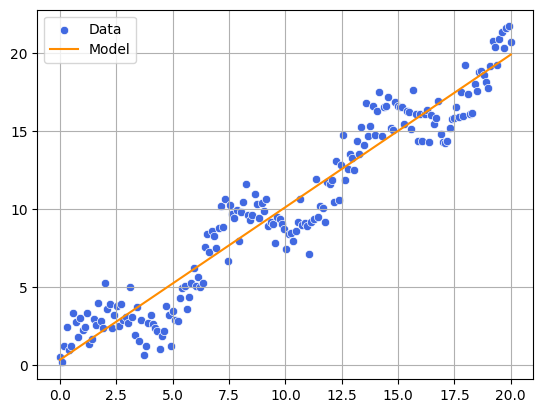

In [12]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1,1), dtype=torch.float32)).cpu().numpy() 
    
sns.scatterplot(x=X, y=y, color='royalblue', label='Data') 
sns.lineplot(x=X, y=Y_pred.ravel(), color='darkorange', label='Model')

plt.grid(True)
plt.show()

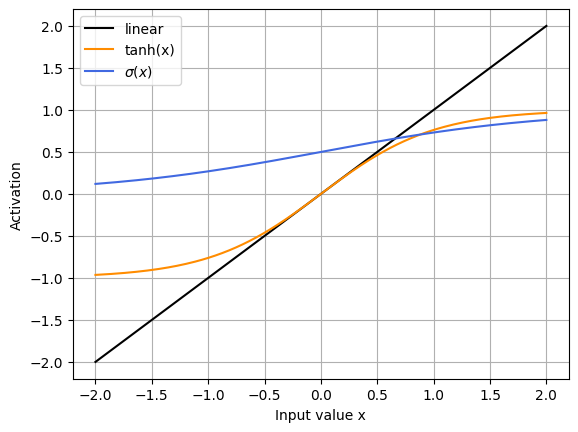

In [14]:
activation_input = np.linspace(-2, 2, num=200)

tanh_activation = np.tanh(activation_input)

sigmoid_activation = np.exp(activation_input)/(np.exp(activation_input)+1)

sns.lineplot(x=activation_input, y=activation_input, color='black', label="linear")
sns.lineplot(x=activation_input, y=tanh_activation, color='darkorange', label="tanh(x)")
ax = sns.lineplot(x=activation_input, y=sigmoid_activation, color='royalblue', label="$\sigma(x)$")
ax.set_xlabel('Input value x')
ax.set_ylabel('Activation')

plt.grid(True)
plt.show()

In [15]:
model = nn.Sequential(
    nn.Linear(1,  10),
    nn.Tanh(),#activation
    nn.Linear(10, 1),
)

train_simple_network(model, loss_func, training_loader, epochs=200)

Epoch: 100%|██████████| 200/200 [00:26<00:00,  7.47it/s]


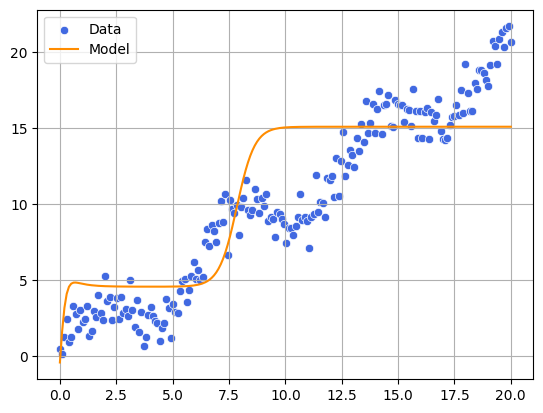

In [18]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1,1), dtype=torch.float32)).cpu().numpy()
    
sns.scatterplot(x=X, y=y, color='royalblue', label='Data') 
sns.lineplot(x=X, y=Y_pred.ravel(), color='darkorange', label='Model') 

plt.grid(True)
plt.show()

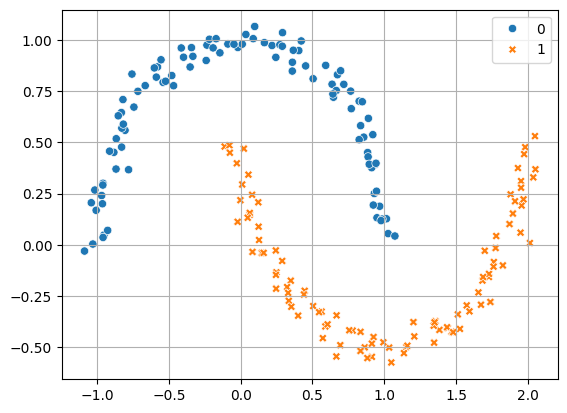

In [20]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y)

plt.grid(True)
plt.show()

In [21]:
classification_dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long))

training_loader = DataLoader(classification_dataset)

In [22]:
in_features = 2

out_features = 2

model = nn.Linear(in_features, out_features)

In [23]:
loss_func = nn.CrossEntropyLoss()

train_simple_network(model, 
loss_func, 
training_loader, 
epochs=50)

Batch:   0%|          | 0/200 [00:00<?, ?it/s]
                                              
Batch:  92%|█████████▎| 185/200 [00:00<00:00, 1849.16it/s]
                                                          
Batch:   0%|          | 0/200 [00:00<?, ?it/s]
                                              
Batch:   0%|          | 0/200 [00:00<?, ?it/s]
                                              
Batch:   0%|          | 0/200 [00:00<?, ?it/s]
                                              
Batch:   0%|          | 0/200 [00:00<?, ?it/s]
                                              
Batch:   0%|          | 0/200 [00:00<?, ?it/s]
                                              
Batch:   0%|          | 0/200 [00:00<?, ?it/s]
                                              
Batch:   0%|          | 0/200 [00:00<?, ?it/s]
                                              
Batch:   0%|          | 0/200 [00:00<?, ?it/s]
                                              
Batch:   0%|          | 0/200 [00:00

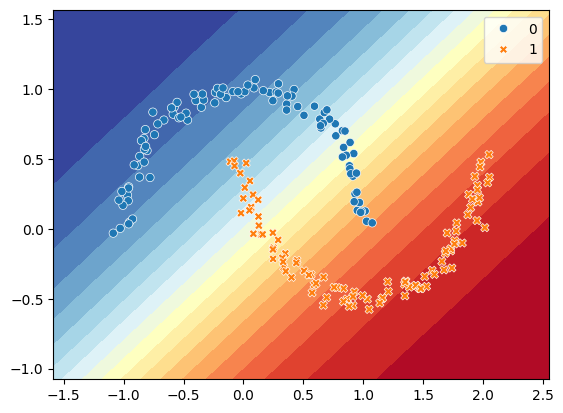

In [24]:
def visualize2DSoftmax(X, y, model, title=None):
    x_min = np.min(X[:,0])-0.5
    x_max = np.max(X[:,0])+0.5
    y_min = np.min(X[:,1])-0.5
    y_max = np.max(X[:,1])+0.5
    xv, yv = np.meshgrid(np.linspace(x_min, x_max, num=20), np.linspace(y_min, y_max, num=20), indexing='ij')
    xy_v = np.hstack((xv.reshape(-1,1), yv.reshape(-1,1)))
    with torch.no_grad():
        logits = model(torch.tensor(xy_v, dtype=torch.float32))
        y_hat = F.softmax(logits, dim=1).numpy()

    cs = plt.contourf(xv, yv, y_hat[:,0].reshape(20,20), levels=np.linspace(0,1,num=20), cmap=plt.cm.RdYlBu)
    ax = plt.gca()
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax)
    if title is not None:
        ax.set_title(title)

visualize2DSoftmax(X, y, model)

In [25]:
model = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)
train_simple_network(model, loss_func, training_loader, epochs=250)

Epoch: 100%|██████████| 250/250 [00:36<00:00,  6.79it/s]


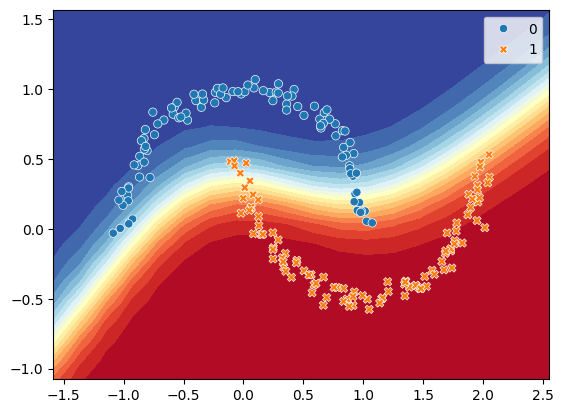

In [26]:
visualize2DSoftmax(X, y, model)

In [27]:
def run_epoch(model, optimizer, data_loader, loss_func, device, results, score_funcs, prefix="", desc=None):
    running_loss = []
    y_true = []
    y_pred = []
    start = time.time()
    for inputs, labels in tqdm(data_loader, desc=desc, leave=False):
        inputs = moveTo(inputs, device)
        labels = moveTo(labels, device)

        y_hat = model(inputs) 
        loss = loss_func(y_hat, labels)

        if model.training:
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        running_loss.append(loss.item())

        if len(score_funcs) > 0 and isinstance(labels, torch.Tensor):
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            y_true.extend(labels.tolist())
            y_pred.extend(y_hat.tolist())
    end = time.time()
    
    y_pred = np.asarray(y_pred)
    if len(y_pred.shape) == 2 and y_pred.shape[1] > 1: 
        y_pred = np.argmax(y_pred, axis=1)
    
    results[prefix + " loss"].append( np.mean(running_loss) )
    for name, score_func in score_funcs.items():
        try:
            results[prefix + " " + name].append( score_func(y_true, y_pred) )
        except:
            results[prefix + " " + name].append(float("NaN"))
    return end-start 

In [28]:
def train_simple_network(model, loss_func, train_loader, test_loader=None, score_funcs=None, 
                         epochs=50, device="cpu", checkpoint_file=None):
    to_track = ["epoch", "total time", "train loss"]
    if test_loader is not None:
        to_track.append("test loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if test_loader is not None:
            to_track.append("test " + eval_score )
        
    total_train_time = 0 
    results = {}
    for item in to_track:
        results[item] = []
        
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
        model = model.train()
        
        total_train_time += run_epoch(model, optimizer, train_loader, loss_func, device, results, score_funcs, prefix="train", desc="Training")

        results["total time"].append( total_train_time )
        results["epoch"].append( epoch )
        
        if test_loader is not None:
            model = model.eval()
            with torch.no_grad():
                run_epoch(model, optimizer, test_loader, loss_func, device, results, score_funcs, prefix="test", desc="Testing")
                    
    if checkpoint_file is not None:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'results' : results
            }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

In [29]:
X_train, y_train = make_moons(n_samples=8000, noise=0.4)
X_test, y_test = make_moons(n_samples=200, noise=0.4)

# Training & Testing Sets
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

# Data Loaders
training_loader = DataLoader(train_dataset, shuffle=True)
testing_loader = DataLoader(test_dataset)

In [30]:
model = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)

results_pd = train_simple_network(model,
                                  loss_func,
                                  training_loader,
                                  epochs=5,
                                  test_loader=testing_loader,
                                  checkpoint_file='model.pt',
                                  score_funcs={'Acc':accuracy_score,'F1': f1_score})

Training:  99%|█████████▉| 7936/8000 [00:05<00:00, 1410.45it/s]
                                                               
Training: 100%|█████████▉| 7995/8000 [00:05<00:00, 1374.64it/s]
                                                               
Training:  99%|█████████▉| 7952/8000 [00:05<00:00, 1361.03it/s]
                                                               
Training:  99%|█████████▉| 7903/8000 [00:05<00:00, 1426.24it/s]
                                                               
Training:  99%|█████████▉| 7940/8000 [00:05<00:00, 1335.04it/s]
                                                               
Epoch: 100%|██████████| 5/5 [00:29<00:00,  5.85s/it]


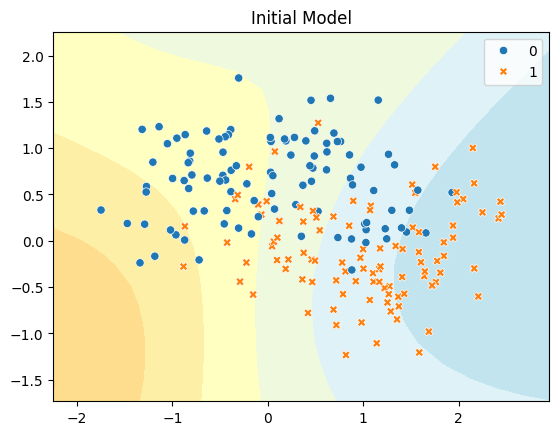

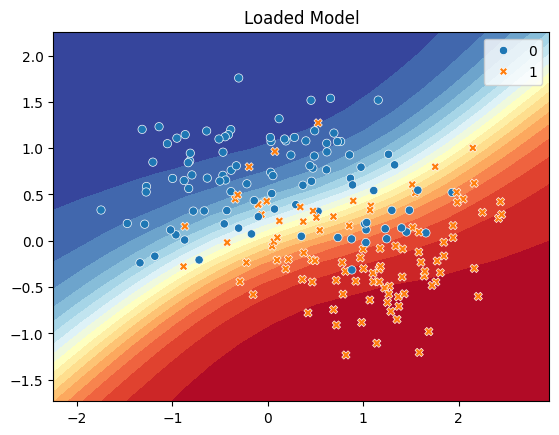

In [31]:
model_new = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)

visualize2DSoftmax(X_test, y_test, model_new, title="Initial Model")
plt.show()

checkpoint_dict = torch.load('model.pt', map_location=device)

model_new.load_state_dict(checkpoint_dict['model_state_dict'])

visualize2DSoftmax(X_test, y_test, model_new, title="Loaded Model")
plt.show()

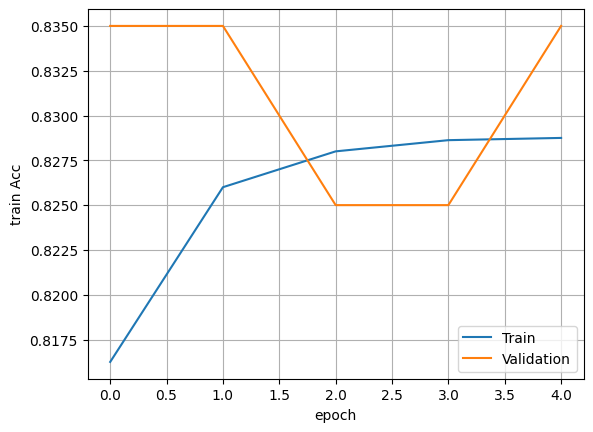

In [32]:
sns.lineplot(x='epoch', y='train Acc', data=results_pd, label='Train')
sns.lineplot(x='epoch', y='test Acc', data=results_pd, label='Validation')

plt.grid(True)
plt.show()

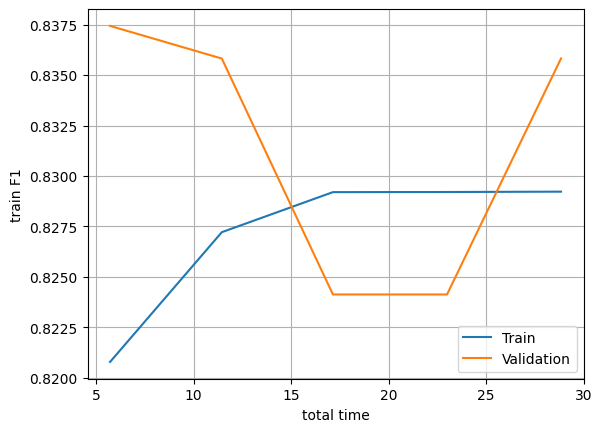

In [33]:
sns.lineplot(x='total time', y='train F1', data=results_pd, label='Train')
sns.lineplot(x='total time', y='test F1', data=results_pd, label='Validation')

plt.grid(True)
plt.show()

In [34]:
training_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
testing_loader = DataLoader(test_dataset, batch_size=len(test_dataset))
model_gd = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)
results_true_gd = train_simple_network(model_gd,
                                       loss_func,
                                       training_loader,
                                       epochs=5,
                                       test_loader=testing_loader,
                                       checkpoint_file='model.pt',
                                       score_funcs={'Acc':accuracy_score,'F1': f1_score})

Training:   0%|          | 0/1 [00:00<?, ?it/s]
                                               
Training: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]
                                                       
Training:   0%|          | 0/1 [00:00<?, ?it/s]
                                               
Testing:   0%|          | 0/1 [00:00<?, ?it/s]
                                              
Training:   0%|          | 0/1 [00:00<?, ?it/s]
                                               
Training: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]
                                                       
Epoch: 100%|██████████| 5/5 [00:00<00:00,  6.82it/s]


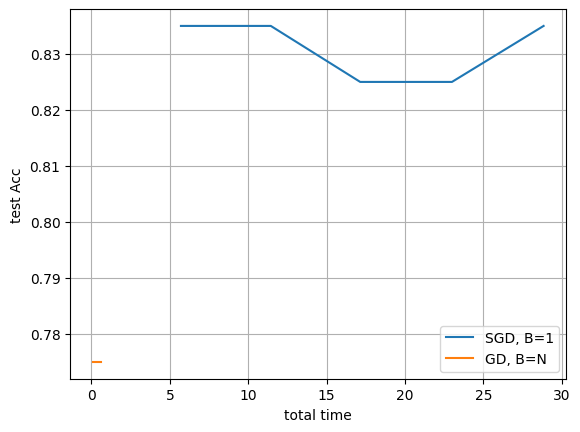

In [35]:
sns.lineplot(x='total time', y='test Acc', data=results_pd, label='SGD, B=1')
sns.lineplot(x='total time', y='test Acc', data=results_true_gd, label='GD, B=N')

plt.grid(True)
plt.show()

In [36]:
training_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
model_sgd = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)
results_batched = train_simple_network(model_sgd,
                                       loss_func,
                                       training_loader,
                                       epochs=5,
                                       test_loader=testing_loader,
                                       checkpoint_file='model.pt',
                                       score_funcs={'Acc':accuracy_score,'F1': f1_score})

Training:  77%|███████▋  | 192/250 [00:00<00:00, 944.40it/s]
                                                            
Training:  78%|███████▊  | 196/250 [00:00<00:00, 926.66it/s]
                                                            
Training:  75%|███████▌  | 188/250 [00:00<00:00, 809.77it/s]
                                                            
Training:  82%|████████▏ | 206/250 [00:00<00:00, 976.98it/s] 
                                                            
Training:  71%|███████   | 177/250 [00:00<00:00, 896.80it/s]
                                                            
Epoch: 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]


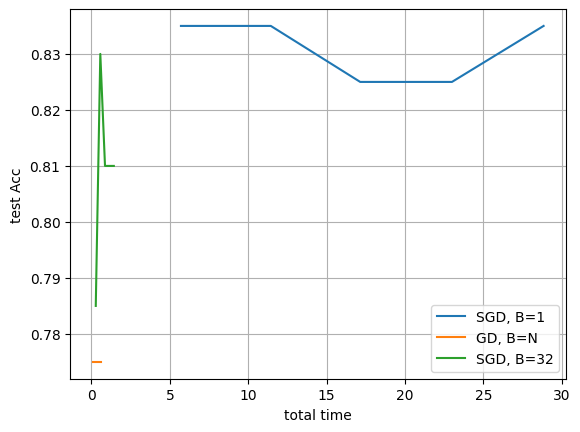

In [37]:
sns.lineplot(x='total time', y='test Acc', data=results_pd, label='SGD, B=1')
sns.lineplot(x='total time', y='test Acc', data=results_true_gd, label='GD, B=N')
sns.lineplot(x='total time', y='test Acc', data=results_batched, label='SGD, B=32')

plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ab78811-81e6-4cda-8722-51edf8cbc03c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>